# Facebook Prophet for foot traffic
## setup imports


In [35]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import pandas_datareader as web

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import AUC, Accuracy
from tensorflow.keras.layers import Dense, Dropout, LSTM

import datetime as dt

from fbprophet import Prophet


## Setup training data


In [84]:
company = 'FB'
start = dt.datetime(2012, 1, 1)
# end = dt.datetime(2020, 1, 1)
end = dt.datetime.now() - dt.timedelta(days=1)
CLOSE = 'Close'
train_data = web.DataReader(company, 'yahoo', start, end)
train_close_data = train_data[CLOSE]




In [86]:
df = train_data['Close']
df = df.reset_index()
df = df.rename(columns = {'index':'ds'})
# # Creates the datetime object from date
df.columns=["ds", "y"]
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,ds,y
0,2012-05-18,38.230000
1,2012-05-21,34.029999
2,2012-05-22,31.000000
3,2012-05-23,32.000000
4,2012-05-24,33.029999


## setup model and predicitons

In [87]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [94]:
# place holder for future predictions
future = m.make_future_dataframe(periods=7*4)

forcast = m.predict(future)



In [95]:
forcast[["ds", "yhat_lower", "yhat_upper", "yhat"]].tail(7)

,ds,yhat_lower,yhat_upper,yhat
2249,2021-04-17,272.843111,301.214839,287.580333
2250,2021-04-18,274.072050,301.783648,288.056130
2251,2021-04-19,263.101317,290.422909,277.357638
2252,2021-04-20,265.151851,292.471105,278.148954
2253,2021-04-21,265.475928,291.947099,278.735321
2254,2021-04-22,264.158529,292.770765,279.202113
2255,2021-04-23,265.922939,293.775369,279.669333


## plot actual vs predicted

In [104]:
from fbprophet.plot import plot_plotly
import plotly.offline as py
fig = plot_plotly(m, forcast, ylabel=f'{company} close price', xlabel='date')

fig.update_layout(title=company)
py.plot(fig, filename=f"{company}.html")
fig.show()

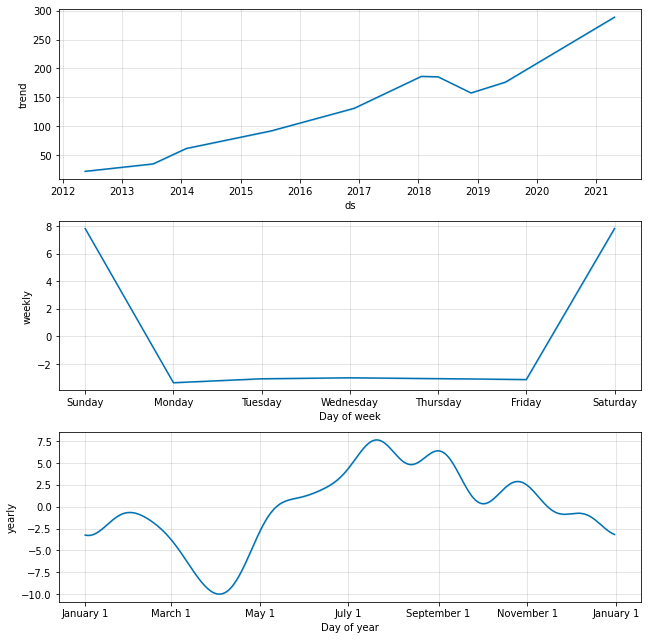

In [97]:
m.plot_components(forcast);

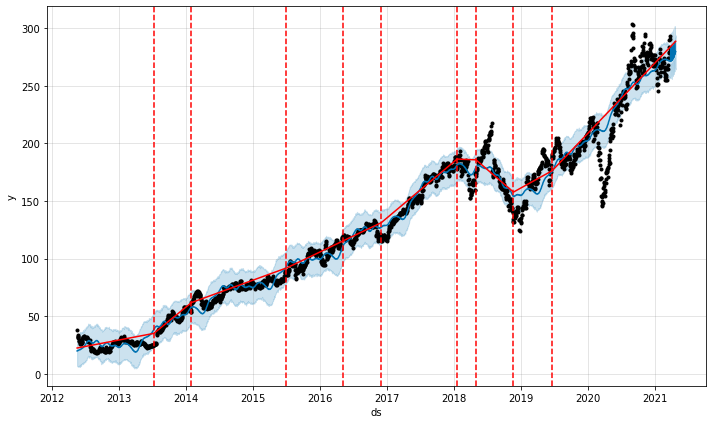

In [98]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forcast)
a = add_changepoints_to_plot(fig.gca(), m, forcast)

## RMSE: how good is it

In [99]:

# se = np.square(forcast.loc[:, 'yhat'][-10:] - df['y'][-10:])
se = np.square(forcast.loc[:, 'yhat'] - df['y'])
mse = np.mean(se)
rmse = np.sqrt(mse)
rmse_str = "{:0.2f}".format(rmse)
print("rmse: " + rmse_str)

rmse: 10.89
